<a href="https://colab.research.google.com/github/RomynaECQ/INSE-6220/blob/main/INSE6220_FINAL_PROJECT_RECQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [ ]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


Dataset

The examined dataset comprised Apple's annual/quarterly revenue history and growth rate from 1980 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services. Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/DataRomyna.csv')
df.head(25)

,open,high,low,close,volume,class
0,0.1003,0.1007,0.1003,0.1003,469033600,0
1,0.0955,0.0955,0.0951,0.0951,175884800,1
2,0.0885,0.0885,0.0881,0.0881,105728000,1
3,0.0902,0.0907,0.0902,0.0902,86441600,0
4,0.0929,0.0933,0.0929,0.0929,73449600,0
5,0.0985,0.0990,0.0985,0.0985,48630400,0
6,0.1034,0.1038,0.1034,0.1034,37363200,0
7,0.1077,0.1081,0.1077,0.1077,46950400,0
8,0.1134,0.1138,0.1134,0.1134,48003200,0
9,0.1238,0.1243,0.1238,0.1238,55574400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    69 non-null     float64
 1   high    69 non-null     float64
 2   low     69 non-null     float64
 3   close   69 non-null     float64
 4   volume  69 non-null     int64  
 5   class   69 non-null     int64  
dtypes: float64(4), int64(2)
memory usage: 3.4 KB


In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

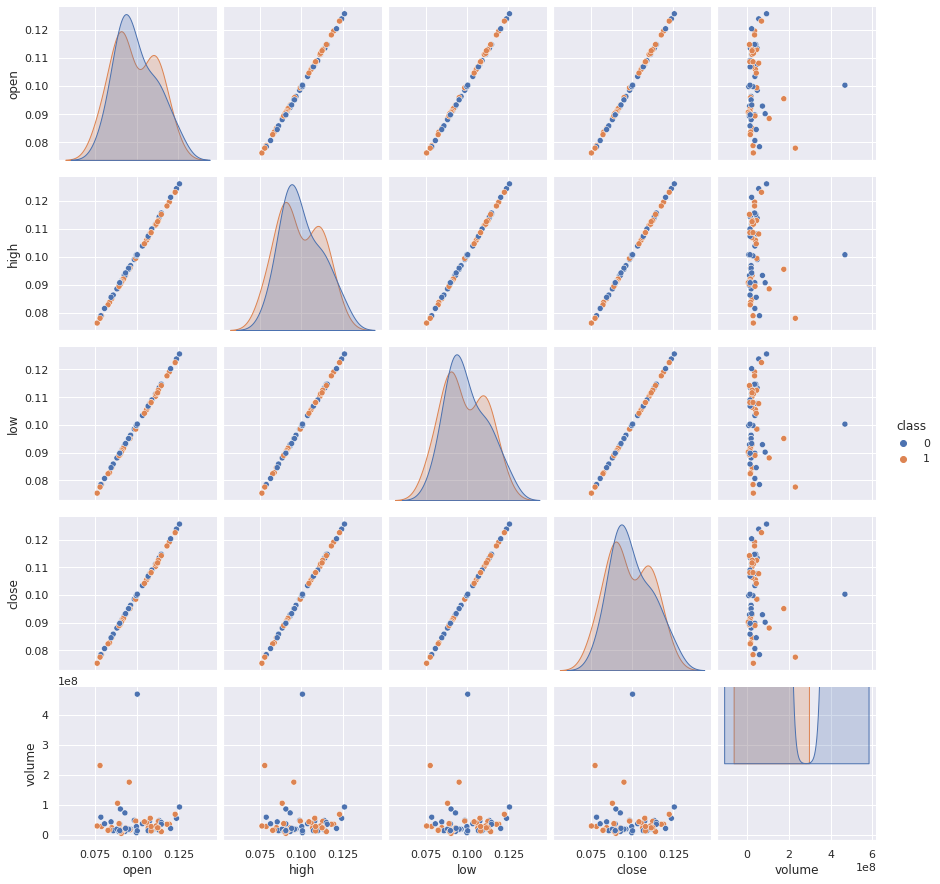

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

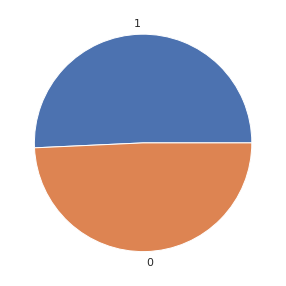

In [ ]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['class'])
X.head(10)

,open,high,low,close,volume
0,0.1003,0.1007,0.1003,0.1003,469033600
1,0.0955,0.0955,0.0951,0.0951,175884800
2,0.0885,0.0885,0.0881,0.0881,105728000
3,0.0902,0.0907,0.0902,0.0902,86441600
4,0.0929,0.0933,0.0929,0.0929,73449600
5,0.0985,0.0990,0.0985,0.0985,48630400
6,0.1034,0.1038,0.1034,0.1034,37363200
7,0.1077,0.1081,0.1077,0.1077,46950400
8,0.1134,0.1138,0.1134,0.1134,48003200
9,0.1238,0.1243,0.1238,0.1238,55574400


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,69.0,9.916087e-02,1.252062e-02,7.630000e-02,8.980000e-02,9.590000e-02,1.090000e-01,1.256000e-01
high,69.0,9.945652e-02,1.253875e-02,7.630000e-02,9.070000e-02,9.590000e-02,1.099000e-01,1.260000e-01
low,69.0,9.889565e-02,1.254489e-02,7.540000e-02,8.980000e-02,9.510000e-02,1.090000e-01,1.256000e-01
close,69.0,9.889565e-02,1.254489e-02,7.540000e-02,8.980000e-02,9.510000e-02,1.090000e-01,1.256000e-01
volume,69.0,4.189190e+07,6.339195e+07,5.376000e+06,1.476160e+07,2.376640e+07,4.374720e+07,4.690336e+08


**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,open,high,low,close,volume
0,0.091647,0.099897,0.112766,0.112766,6.787470
1,-0.294529,-0.317855,-0.304782,-0.304782,2.129206
2,-0.857703,-0.880215,-0.866866,-0.866866,1.014384
3,-0.720932,-0.703473,-0.698241,-0.698241,0.707914
4,-0.503708,-0.494597,-0.481437,-0.481437,0.501466
5,-0.053169,-0.036676,-0.031770,-0.031770,0.107078
6,0.341052,0.348942,0.361689,0.361689,-0.071963
7,0.687002,0.694392,0.706969,0.706969,0.080382
8,1.145586,1.152313,1.164666,1.164666,0.097111
9,1.982301,1.995852,1.999763,1.999763,0.217421


In [ ]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open,69.0,-1.799688e-15,1.007326,-1.839234,-0.753113,-0.262348,0.791591,2.127117
high,69.0,4.344351e-16,1.007326,-1.860327,-0.703473,-0.285721,0.838998,2.132425
low,69.0,-1.791643e-15,1.007326,-1.886647,-0.730360,-0.304782,0.811356,2.144298
close,69.0,-1.791643e-15,1.007326,-1.886647,-0.730360,-0.304782,0.811356,2.144298
volume,69.0,-2.413528e-17,1.007326,-0.580254,-0.431112,-0.288022,0.029482,6.787470


**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

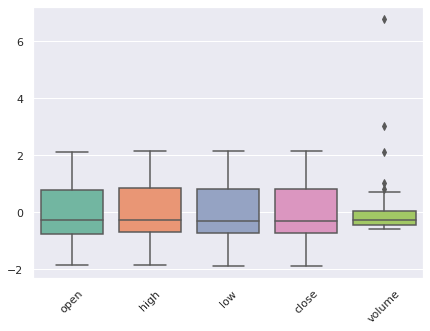

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

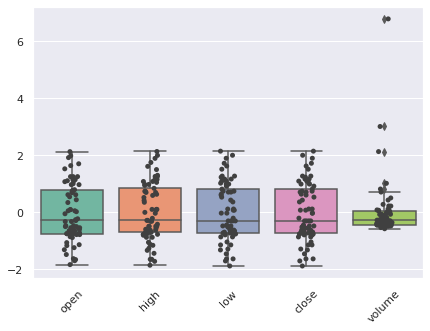

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

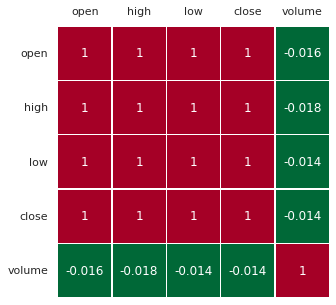

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

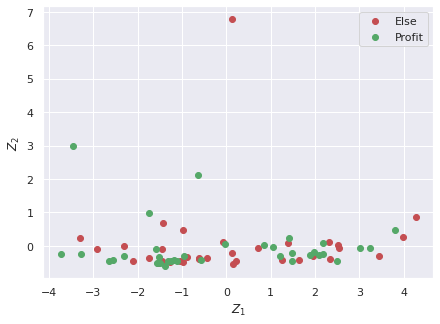

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Else')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Profit')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

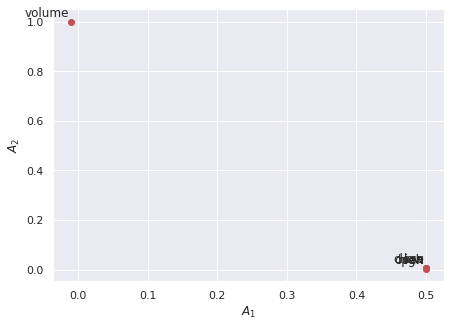

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


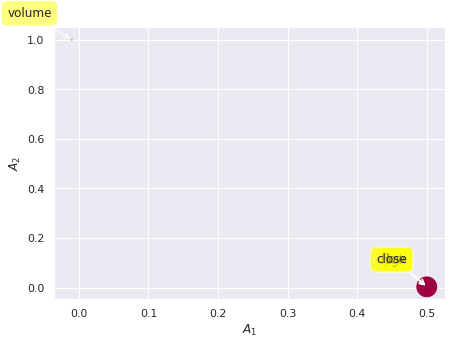

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

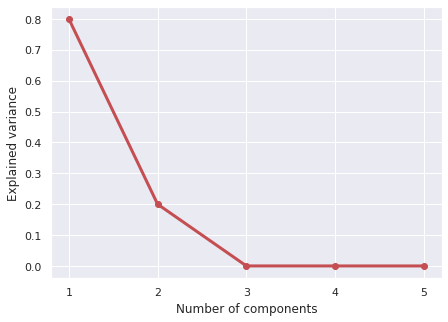

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

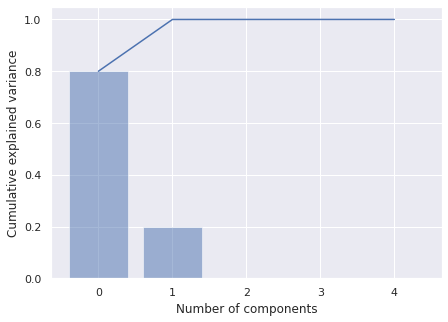

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

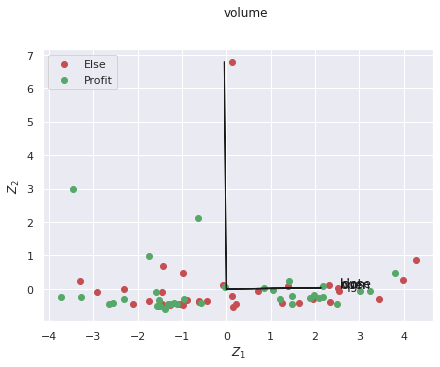

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Else')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Profit')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=5a7cf4cc0b7392feb95f2dd36b648f8507eb89be52681dc3a9f5fb8948383f2a
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=04cceea8330e554874559f8bedcaddb1dfe5935f2580d602ad0289085ab9dc13
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built adjustText wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

,PC1,PC2
0,0.138639,6.789269
1,-0.632867,2.122813
2,-1.746178,0.996474
3,-1.417657,0.693380
4,-0.985700,0.491386
...,...,...
64,-2.294438,0.005816
65,-1.457765,-0.093782
66,-1.590450,-0.081202
67,-1.454111,-0.448640


**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [69] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [69] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f312599cbb0>)

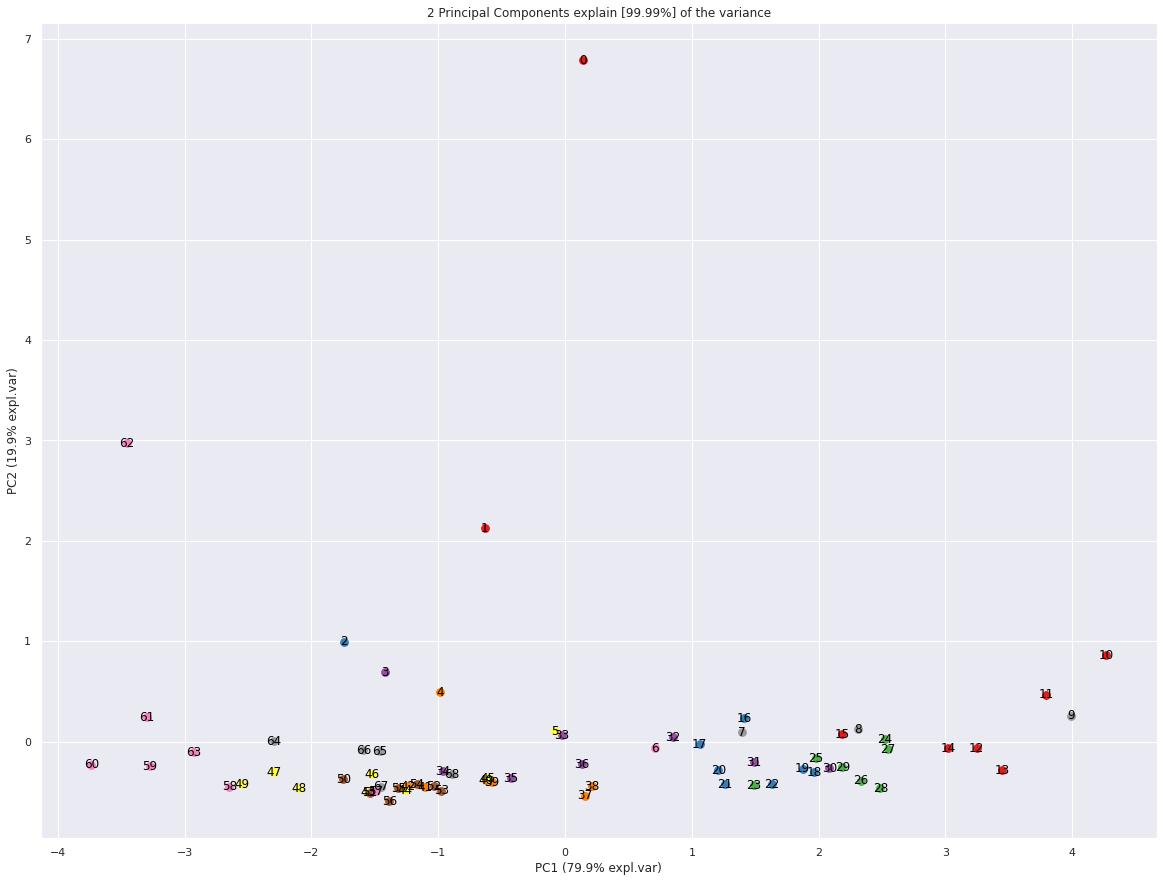

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

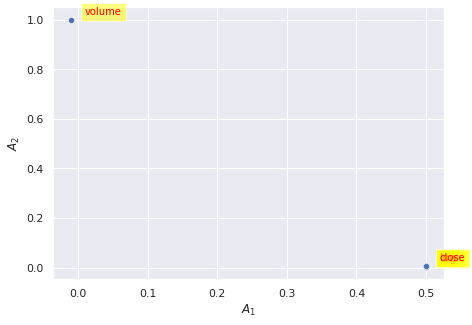

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

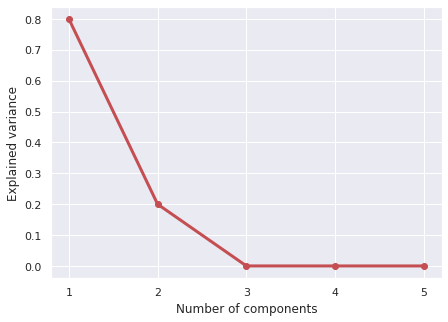

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

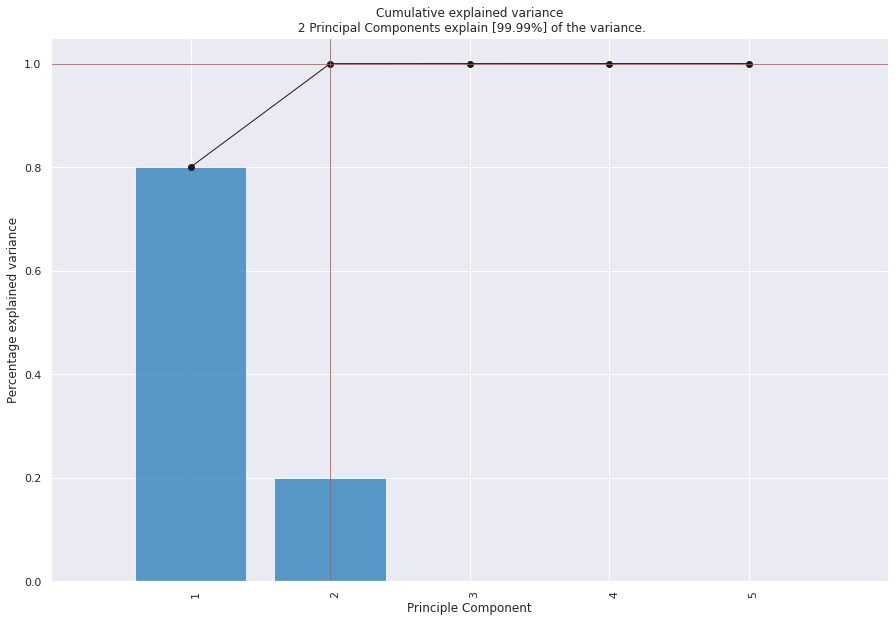

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [69] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [69] unique colors! Available unique colors: [9].


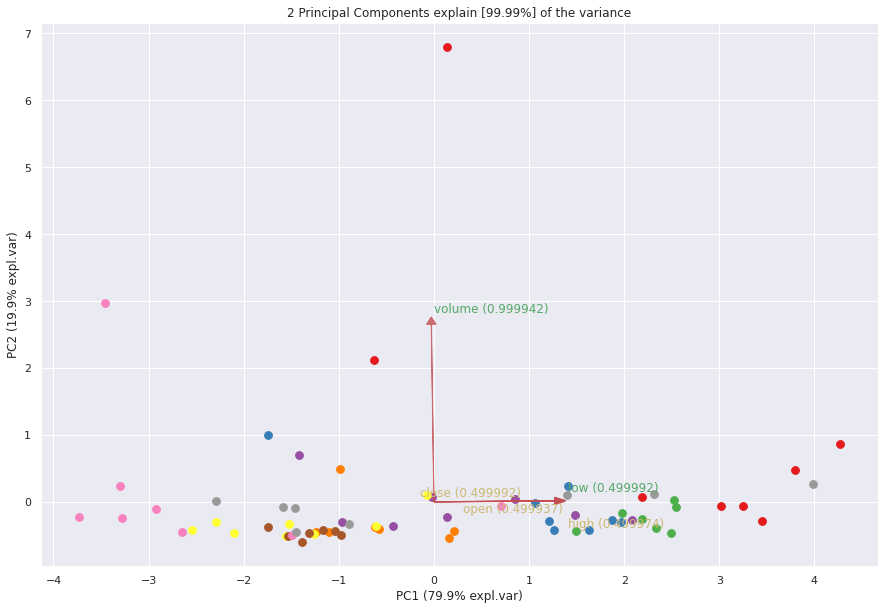

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f311aa3ccd0>)

In [ ]:
model.biplot(label=False, legend=False)

In [ ]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (62, 6)
Unseen Data For Predictions: (7, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(62, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.555,0.0000,0.9000,0.5083,0.6445,0.1045,0.1190,0.009
ada,Ada Boost Classifier,0.515,0.4417,0.5333,0.5183,0.4850,0.0357,0.0373,0.066
qda,Quadratic Discriminant Analysis,0.510,0.6500,0.9000,0.4767,0.6205,0.0000,0.0000,0.011
lda,Linear Discriminant Analysis,0.495,0.5917,0.5500,0.5083,0.5067,0.0084,-0.0035,0.010
lr,Logistic Regression,0.490,0.5500,0.0000,0.0000,0.0000,0.0000,0.0000,0.263
nb,Naive Bayes,0.485,0.6500,0.9000,0.4600,0.6071,-0.0500,-0.0577,0.010
rf,Random Forest Classifier,0.485,0.5500,0.5000,0.3583,0.4124,-0.0108,-0.0132,0.161
svm,SVM - Linear Kernel,0.470,0.0000,0.3000,0.1400,0.1905,0.0000,0.0000,0.011
lightgbm,Light Gradient Boosting Machine,0.470,0.5000,0.8000,0.3900,0.5238,0.0000,0.0000,0.091
dummy,Dummy Classifier,0.470,0.5000,0.8000,0.3900,0.5238,0.0000,0.0000,0.007


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2000,0.250,0.5000,0.2500,0.3333,-0.4286,-0.6124
1,0.4000,0.500,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8000,0.750,1.0000,0.7500,0.8571,0.5455,0.6124
3,0.2500,0.250,0.0000,0.0000,0.0000,-0.5000,-0.5774
4,0.7500,0.750,0.5000,1.0000,0.6667,0.5000,0.5774
5,0.2500,0.250,0.0000,0.0000,0.0000,-0.5000,-0.5774
6,0.2500,0.250,0.0000,0.0000,0.0000,-0.5000,-0.5774
7,0.7500,0.750,1.0000,0.6667,0.8000,0.5000,0.5774
8,0.0000,0.000,0.0000,0.0000,0.0000,-1.0000,-1.0000
9,0.2500,0.250,0.5000,0.3333,0.4000,-0.5000,-0.5774


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.4167,0.5000,0.5000,0.5000,0.1667,0.1667
1,0.2000,0.2500,0.3333,0.3333,0.3333,-0.6667,-0.6667
2,0.8000,0.5000,1.0000,0.7500,0.8571,0.5455,0.6124
3,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
4,0.5000,0.7500,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.5000,0.8750,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.2500,0.1250,0.0000,0.0000,0.0000,-0.5000,-0.5774
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.5000,0.3750,0.5000,0.5000,0.5000,0.0000,0.0000
9,0.7500,1.0000,1.0000,0.6667,0.8000,0.5000,0.5774


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.200,0.3333,0.0000,0.0000,0.0000,-0.6667,-0.6667
1,0.400,0.4167,0.3333,0.5000,0.4000,-0.1538,-0.1667
2,0.600,0.6667,1.0000,0.6000,0.7500,0.0000,0.0000
3,0.000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
4,0.500,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
5,0.500,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.250,0.2500,0.0000,0.0000,0.0000,-0.5000,-0.5774
7,0.750,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774
8,0.250,0.3750,0.5000,0.3333,0.4000,-0.5000,-0.5774
9,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,30,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4000,0.4167,0.5000,0.3333,0.4000,-0.1538,-0.1667
1,0.8000,0.7500,0.6667,1.0000,0.8000,0.6154,0.6667
2,0.8000,0.9167,1.0000,0.7500,0.8571,0.5455,0.6124
3,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
4,0.2500,0.1250,0.0000,0.0000,0.0000,-0.5000,-0.5774
5,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.5000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.7500,0.8750,0.5000,1.0000,0.6667,0.5000,0.5774
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.6667,0.0,0.0,0.0,0.0,0.0
1,0.4000,0.3333,0.0,0.0,0.0,0.0,0.0
2,0.4000,0.5000,0.0,0.0,0.0,0.0,0.0
3,0.5000,1.0000,0.0,0.0,0.0,0.0,0.0
4,0.5000,0.7500,0.0,0.0,0.0,0.0,0.0
5,0.5000,0.7500,0.0,0.0,0.0,0.0,0.0
6,0.5000,0.5000,0.0,0.0,0.0,0.0,0.0
7,0.5000,0.0000,0.0,0.0,0.0,0.0,0.0
8,0.5000,0.5000,0.0,0.0,0.0,0.0,0.0
9,0.5000,0.5000,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.6667,0.0,0.0,0.0,0.0,0.0
1,0.4000,0.3333,0.0,0.0,0.0,0.0,0.0
2,0.4000,0.5000,0.0,0.0,0.0,0.0,0.0
3,0.5000,1.0000,0.0,0.0,0.0,0.0,0.0
4,0.5000,0.7500,0.0,0.0,0.0,0.0,0.0
5,0.5000,0.7500,0.0,0.0,0.0,0.0,0.0
6,0.5000,0.5000,0.0,0.0,0.0,0.0,0.0
7,0.5000,0.0000,0.0,0.0,0.0,0.0,0.0
8,0.5000,0.5000,0.0,0.0,0.0,0.0,0.0
9,0.5000,0.5000,0.0,0.0,0.0,0.0,0.0


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4000,0.1667,0.5000,0.3333,0.4000,-0.1538,-0.1667
1,0.4000,0.8333,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8000,1.0000,1.0000,0.7500,0.8571,0.5455,0.6124
3,0.2500,0.0000,0.0000,0.0000,0.0000,-0.5000,-0.5774
4,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
5,0.5000,0.5000,0.5000,0.5000,0.5000,0.0000,0.0000
6,0.5000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.7500,1.0000,1.0000,0.6667,0.8000,0.5000,0.5774
8,0.2500,0.2500,0.5000,0.3333,0.4000,-0.5000,-0.5774
9,0.5000,1.0000,1.0000,0.5000,0.6667,0.0000,0.0000


INFO:logs:create_model_container: 25
INFO:logs:master_model_container: 25
INFO:logs:display_container: 13
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4000,0.1667,0.5000,0.3333,0.4000,-0.1538,-0.1667
1,0.6000,0.8333,0.3333,1.0000,0.5000,0.2857,0.4082
2,0.8000,0.6667,1.0000,0.7500,0.8571,0.5455,0.6124
3,0.2500,0.2500,0.0000,0.0000,0.0000,-0.5000,-0.5774
4,0.7500,0.7500,0.5000,1.0000,0.6667,0.5000,0.5774
5,0.2500,0.5000,0.0000,0.0000,0.0000,-0.5000,-0.5774
6,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.5000,1.0000,1.0000,0.5000,0.6667,0.0000,0.0000
8,0.5000,0.2500,0.5000,0.5000,0.5000,0.0000,0.0000
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0005,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=260, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4000,0.0,1.0,0.4000,0.5714,0.0000,0.0000
1,0.6000,0.0,1.0,0.6000,0.7500,0.0000,0.0000
2,0.8000,0.0,1.0,0.7500,0.8571,0.5455,0.6124
3,0.5000,0.0,1.0,0.5000,0.6667,0.0000,0.0000
4,0.5000,0.0,1.0,0.5000,0.6667,0.0000,0.0000
5,0.7500,0.0,1.0,0.6667,0.8000,0.5000,0.5774
6,0.2500,0.0,0.0,0.0000,0.0000,-0.5000,-0.5774
7,0.5000,0.0,1.0,0.5000,0.6667,0.0000,0.0000
8,0.5000,0.0,1.0,0.5000,0.6667,0.0000,0.0000
9,0.7500,0.0,1.0,0.6667,0.8000,0.5000,0.5774


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=8.6, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(62, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.670,0.6750,0.6167,0.7167,0.6300,0.3462,0.3809,0.010
gbc,Gradient Boosting Classifier,0.640,0.6583,0.5667,0.6833,0.5900,0.2782,0.3143,0.072
ada,Ada Boost Classifier,0.610,0.6292,0.5667,0.6167,0.5633,0.2231,0.2488,0.071
rf,Random Forest Classifier,0.600,0.5958,0.6000,0.6833,0.5900,0.2187,0.2793,0.170
nb,Naive Bayes,0.585,0.5083,0.7833,0.5733,0.6305,0.1833,0.2065,0.012
knn,K Neighbors Classifier,0.580,0.6292,0.6500,0.6067,0.5671,0.1901,0.2230,0.016
et,Extra Trees Classifier,0.560,0.6667,0.6167,0.4833,0.5033,0.1418,0.1805,0.148
svm,SVM - Linear Kernel,0.535,0.0000,0.3500,0.3600,0.3250,0.0667,0.0744,0.010
qda,Quadratic Discriminant Analysis,0.510,0.6667,0.9000,0.4767,0.6205,0.0000,0.0000,0.009
lr,Logistic Regression,0.495,0.6417,0.5500,0.5083,0.5067,0.0084,-0.0035,0.019


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.400,0.5000,0.5000,0.3333,0.4000,-0.1538,-0.1667
1,0.800,0.7500,0.6667,1.0000,0.8000,0.6154,0.6667
2,0.600,1.0000,0.3333,1.0000,0.5000,0.2857,0.4082
3,0.750,1.0000,0.5000,1.0000,0.6667,0.5000,0.5774
4,0.750,0.6250,1.0000,0.6667,0.8000,0.5000,0.5774
5,0.500,0.2500,0.5000,0.5000,0.5000,0.0000,0.0000
6,0.750,0.7500,0.5000,1.0000,0.6667,0.5000,0.5774
7,0.500,0.6250,1.0000,0.5000,0.6667,0.0000,0.0000
8,0.750,0.5000,1.0000,0.6667,0.8000,0.5000,0.5774
9,0.750,0.6250,1.0000,0.6667,0.8000,0.5000,0.5774


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6000,0.3333,1.0000,0.5000,0.6667,0.2857,0.4082
1,0.8000,0.8333,0.6667,1.0000,0.8000,0.6154,0.6667
2,0.6000,0.6667,0.3333,1.0000,0.5000,0.2857,0.4082
3,0.7500,1.0000,0.5000,1.0000,0.6667,0.5000,0.5774
4,0.7500,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774
5,0.5000,0.3750,0.5000,0.5000,0.5000,0.0000,0.0000
6,0.7500,0.5000,0.5000,1.0000,0.6667,0.5000,0.5774
7,0.5000,0.7500,0.5000,0.5000,0.5000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,-1.0000,-1.0000
9,0.7500,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.400,0.3333,0.5000,0.3333,0.4000,-0.1538,-0.1667
1,0.800,1.0000,0.6667,1.0000,0.8000,0.6154,0.6667
2,0.600,1.0000,0.3333,1.0000,0.5000,0.2857,0.4082
3,0.750,1.0000,0.5000,1.0000,0.6667,0.5000,0.5774
4,0.750,0.6250,1.0000,0.6667,0.8000,0.5000,0.5774
5,0.500,0.2500,0.5000,0.5000,0.5000,0.0000,0.0000
6,0.750,0.7500,0.5000,1.0000,0.6667,0.5000,0.5774
7,0.500,0.6250,1.0000,0.5000,0.6667,0.0000,0.0000
8,0.750,0.7500,1.0000,0.6667,0.8000,0.5000,0.5774
9,0.750,0.6250,1.0000,0.6667,0.8000,0.5000,0.5774


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


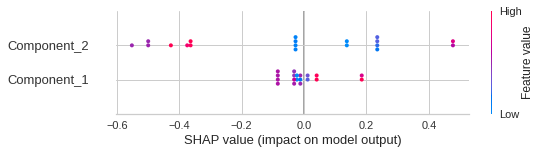

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=5)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=5, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
